In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport


In [ ]:

# EDA using pandas_profiling 
# profile = ProfileReport(pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\influence_data.csv"))

# profile.to_file(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\output_profile_test.html")

In [129]:
df=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\influence_data.csv")
df.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [130]:
df_1=df.copy()

In [5]:
df.columns

Index(['influencer_id', 'influencer_name', 'influencer_main_genre',
       'influencer_active_start', 'follower_id', 'follower_name',
       'follower_main_genre', 'follower_active_start'],
      dtype='object')

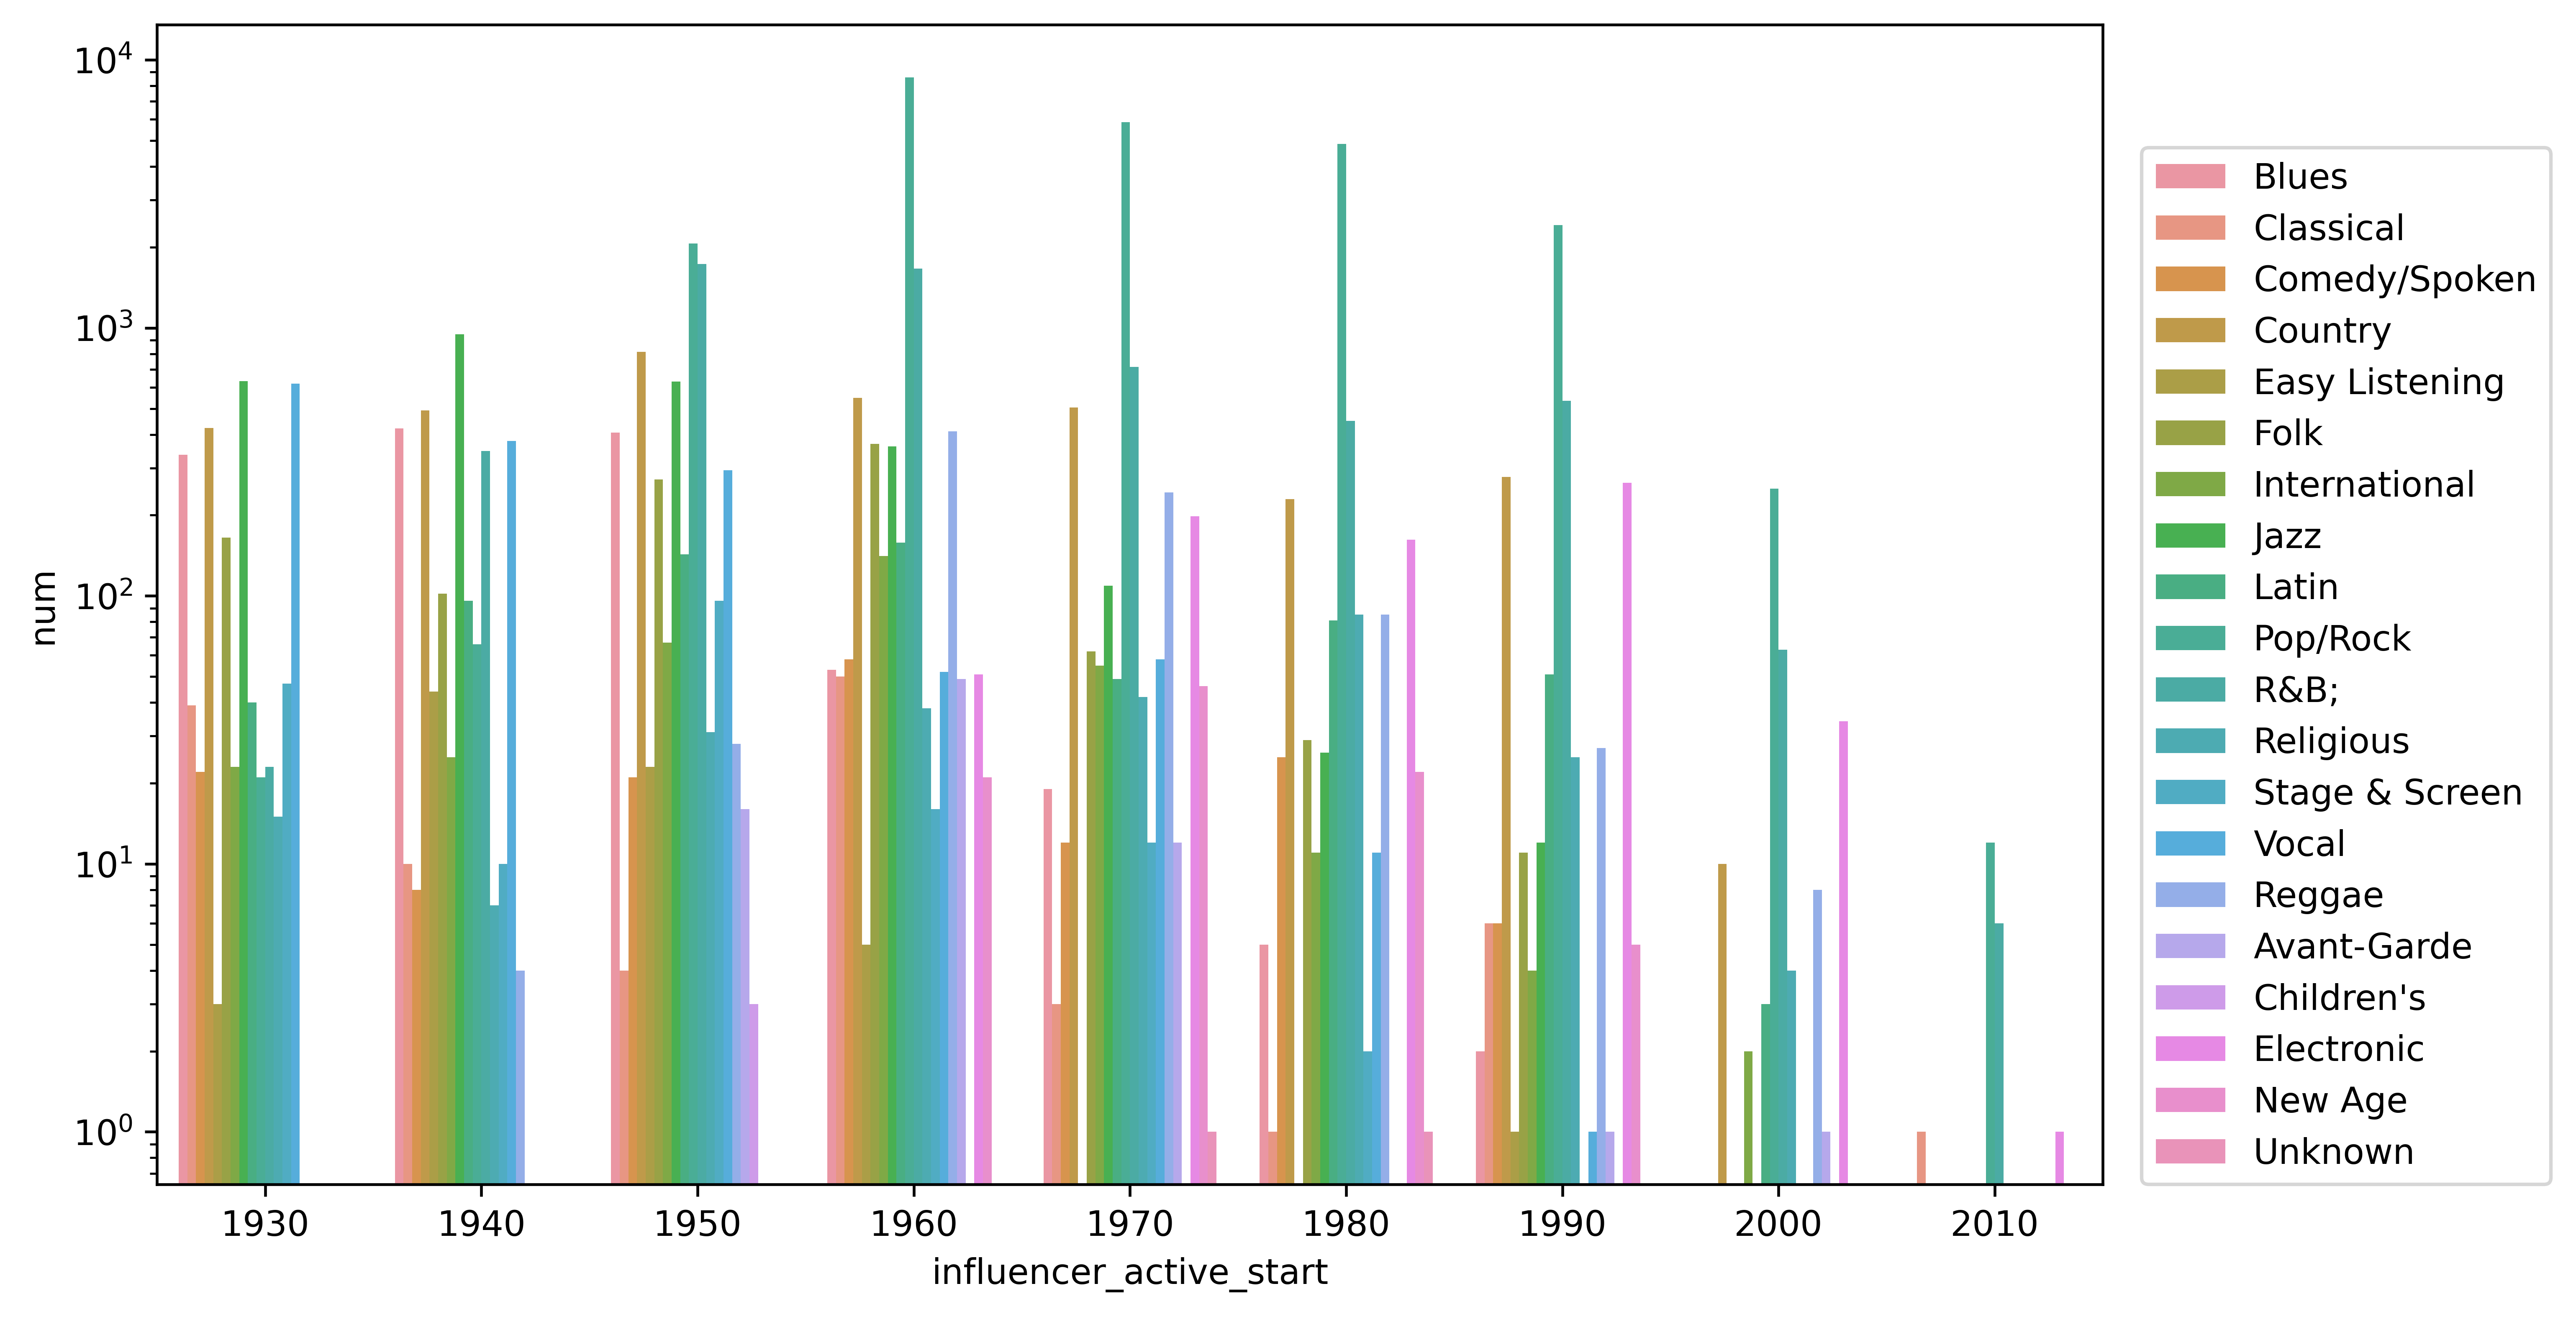

In [77]:
df_year_per = pd.DataFrame(
    df.groupby(['influencer_active_start', 'influencer_main_genre'
                ])['influencer_id'].agg('count').reset_index().rename(
                    columns={'influencer_id': 'num'}))
plt.figure(figsize=(10, 6), dpi=600)
sns.barplot(data=df_year_per,
            x='influencer_active_start',
            y='num',
            hue='influencer_main_genre')
plt.yscale('log')
plt.legend(loc=(1.02, 0))


In [ ]:
plt.figure(figsize=(10, 6), dpi=600)
sns.lineplot(data=df_year_per,
            x='influencer_active_start',
            y='num',
            hue='influencer_main_genre')
# plt.yscale()
plt.legend(loc=(1.02, 0))

In [4]:
import pandas as pd
import numpy as np 
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
plt.style.use('ggplot')

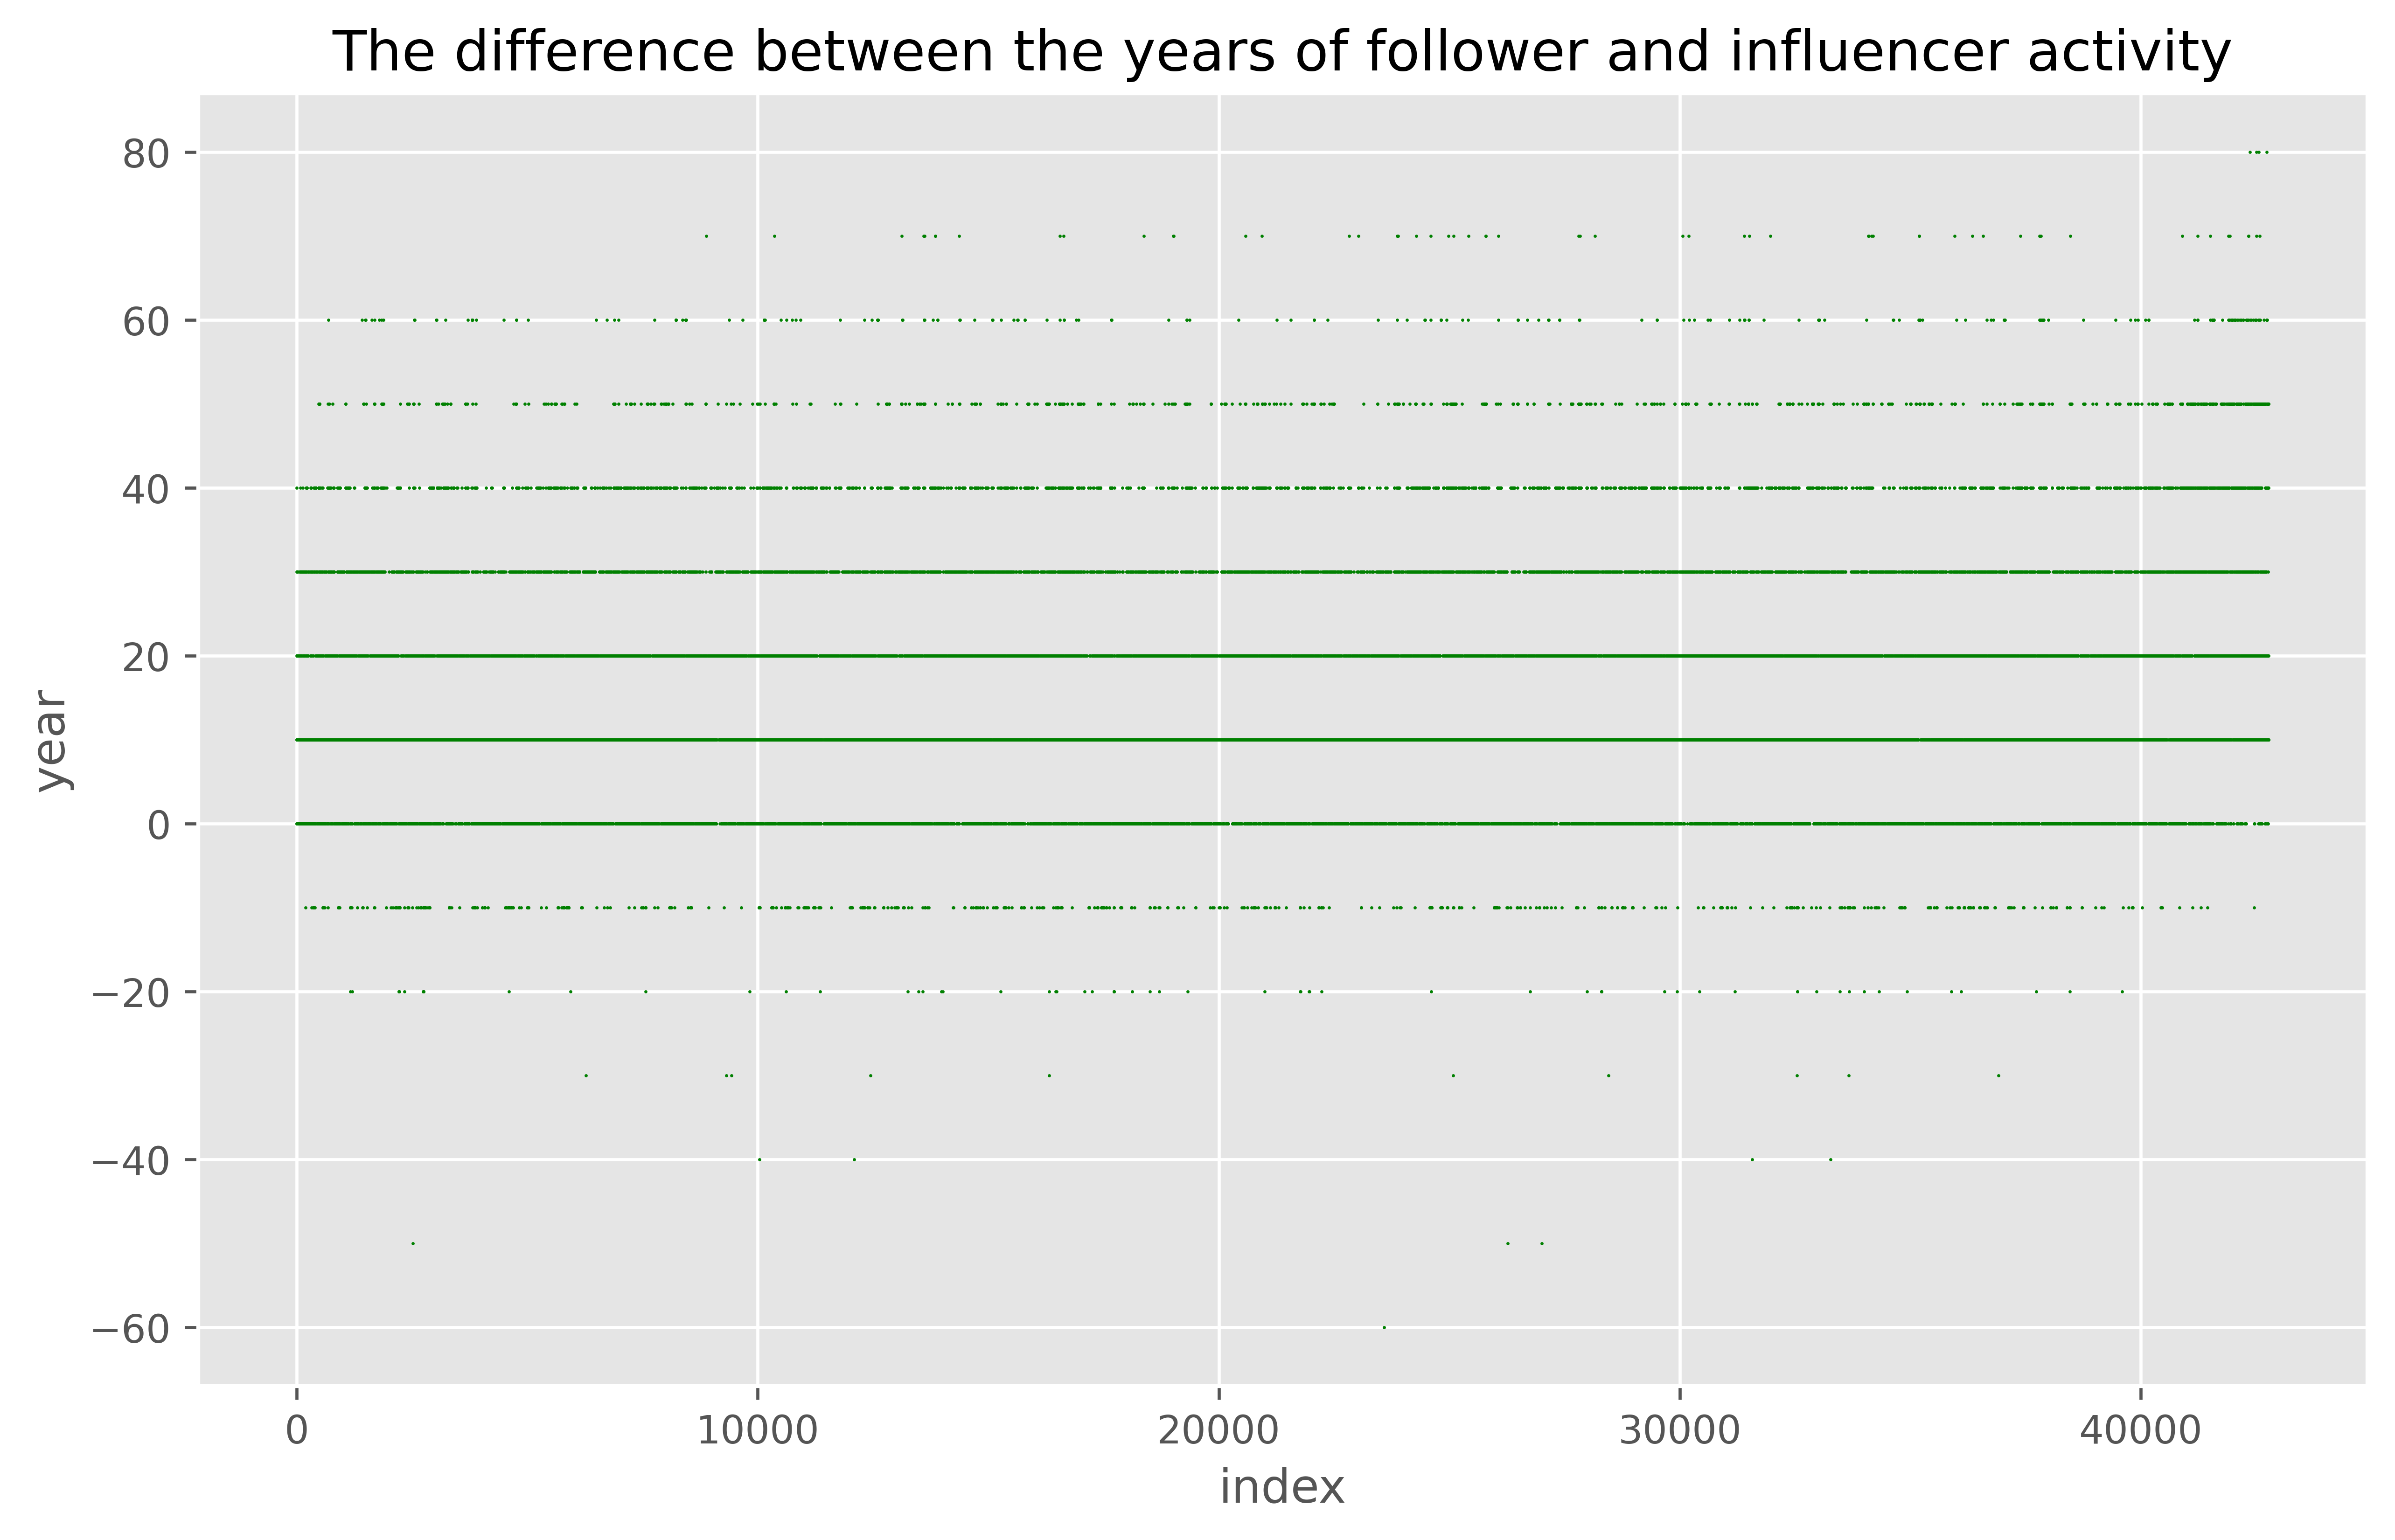

In [103]:
df['range']=df['follower_active_start']-df['influencer_active_start']
plt.figure(figsize=(10,6),dpi=600)
plt.scatter(x=df.index,y=df['range'],s=0.1,c='green')
plt.title("The difference between the years of follower and influencer activity")
plt.xlabel("index")
plt.ylabel("year")
plt.show()

c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'year range count plot')

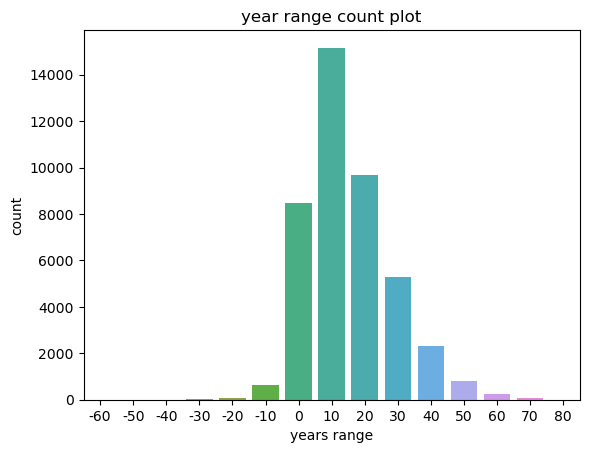

In [97]:
sns.countplot(df['range'])
plt.xlabel('years range')
plt.title("year range count plot")
# plt.legend()

In [82]:
df['range'].describe()

count    42770.000000
mean        15.118541
std         13.100947
min        -60.000000
25%         10.000000
50%         10.000000
75%         20.000000
max         80.000000
Name: range, dtype: float64

In [ ]:
# reset_index().rename(columns={'user_id':'num'})

In [ ]:
sns.barplot(df.groupby(['influencer_active_start','influencer_main_genre']).count())

In [4]:
import networkx as nx

# DG=nx.DiGraph()
DG = nx.from_pandas_edgelist(df, 'influencer_id', 'follower_id',create_using=nx.DiGraph())

# for ind,row in df.iterrows():
    
#     tmp=row['influencer_id']
#     DG.nodes[tmp]['genre']=row['influencer_main_genre']
#     DG.nodes[tmp]['name']=row['influencer_name']
#     tmp=row['follower_id']
#     DG.nodes[tmp]['genre']=row['follower_main_genre']
#     DG.nodes[tmp]['name']=row['follower_name']
    # print(DG.nodes[tmp]['genre'])
    
# DG.add_edges_from(df['edge_type'].tolist())

# nx.write_gexf(DG, "influence_2.gexf")


In [104]:
df_1=df[['influencer_id','influencer_main_genre']].rename(columns={'influencer_id':'id', 'influencer_main_genre':'genre'})
df_2=df[['follower_id','follower_main_genre']].rename(columns={'follower_id':'id', 'follower_main_genre':'genre'})
df_count=df_1.append(df_2).drop_duplicates(subset='id')

C:\Users\ZuYong\AppData\Local\Temp\ipykernel_22296\2150833131.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [110]:
df_count['num']=1

In [114]:
result = df_count[['genre','num']].groupby('genre').agg('sum')

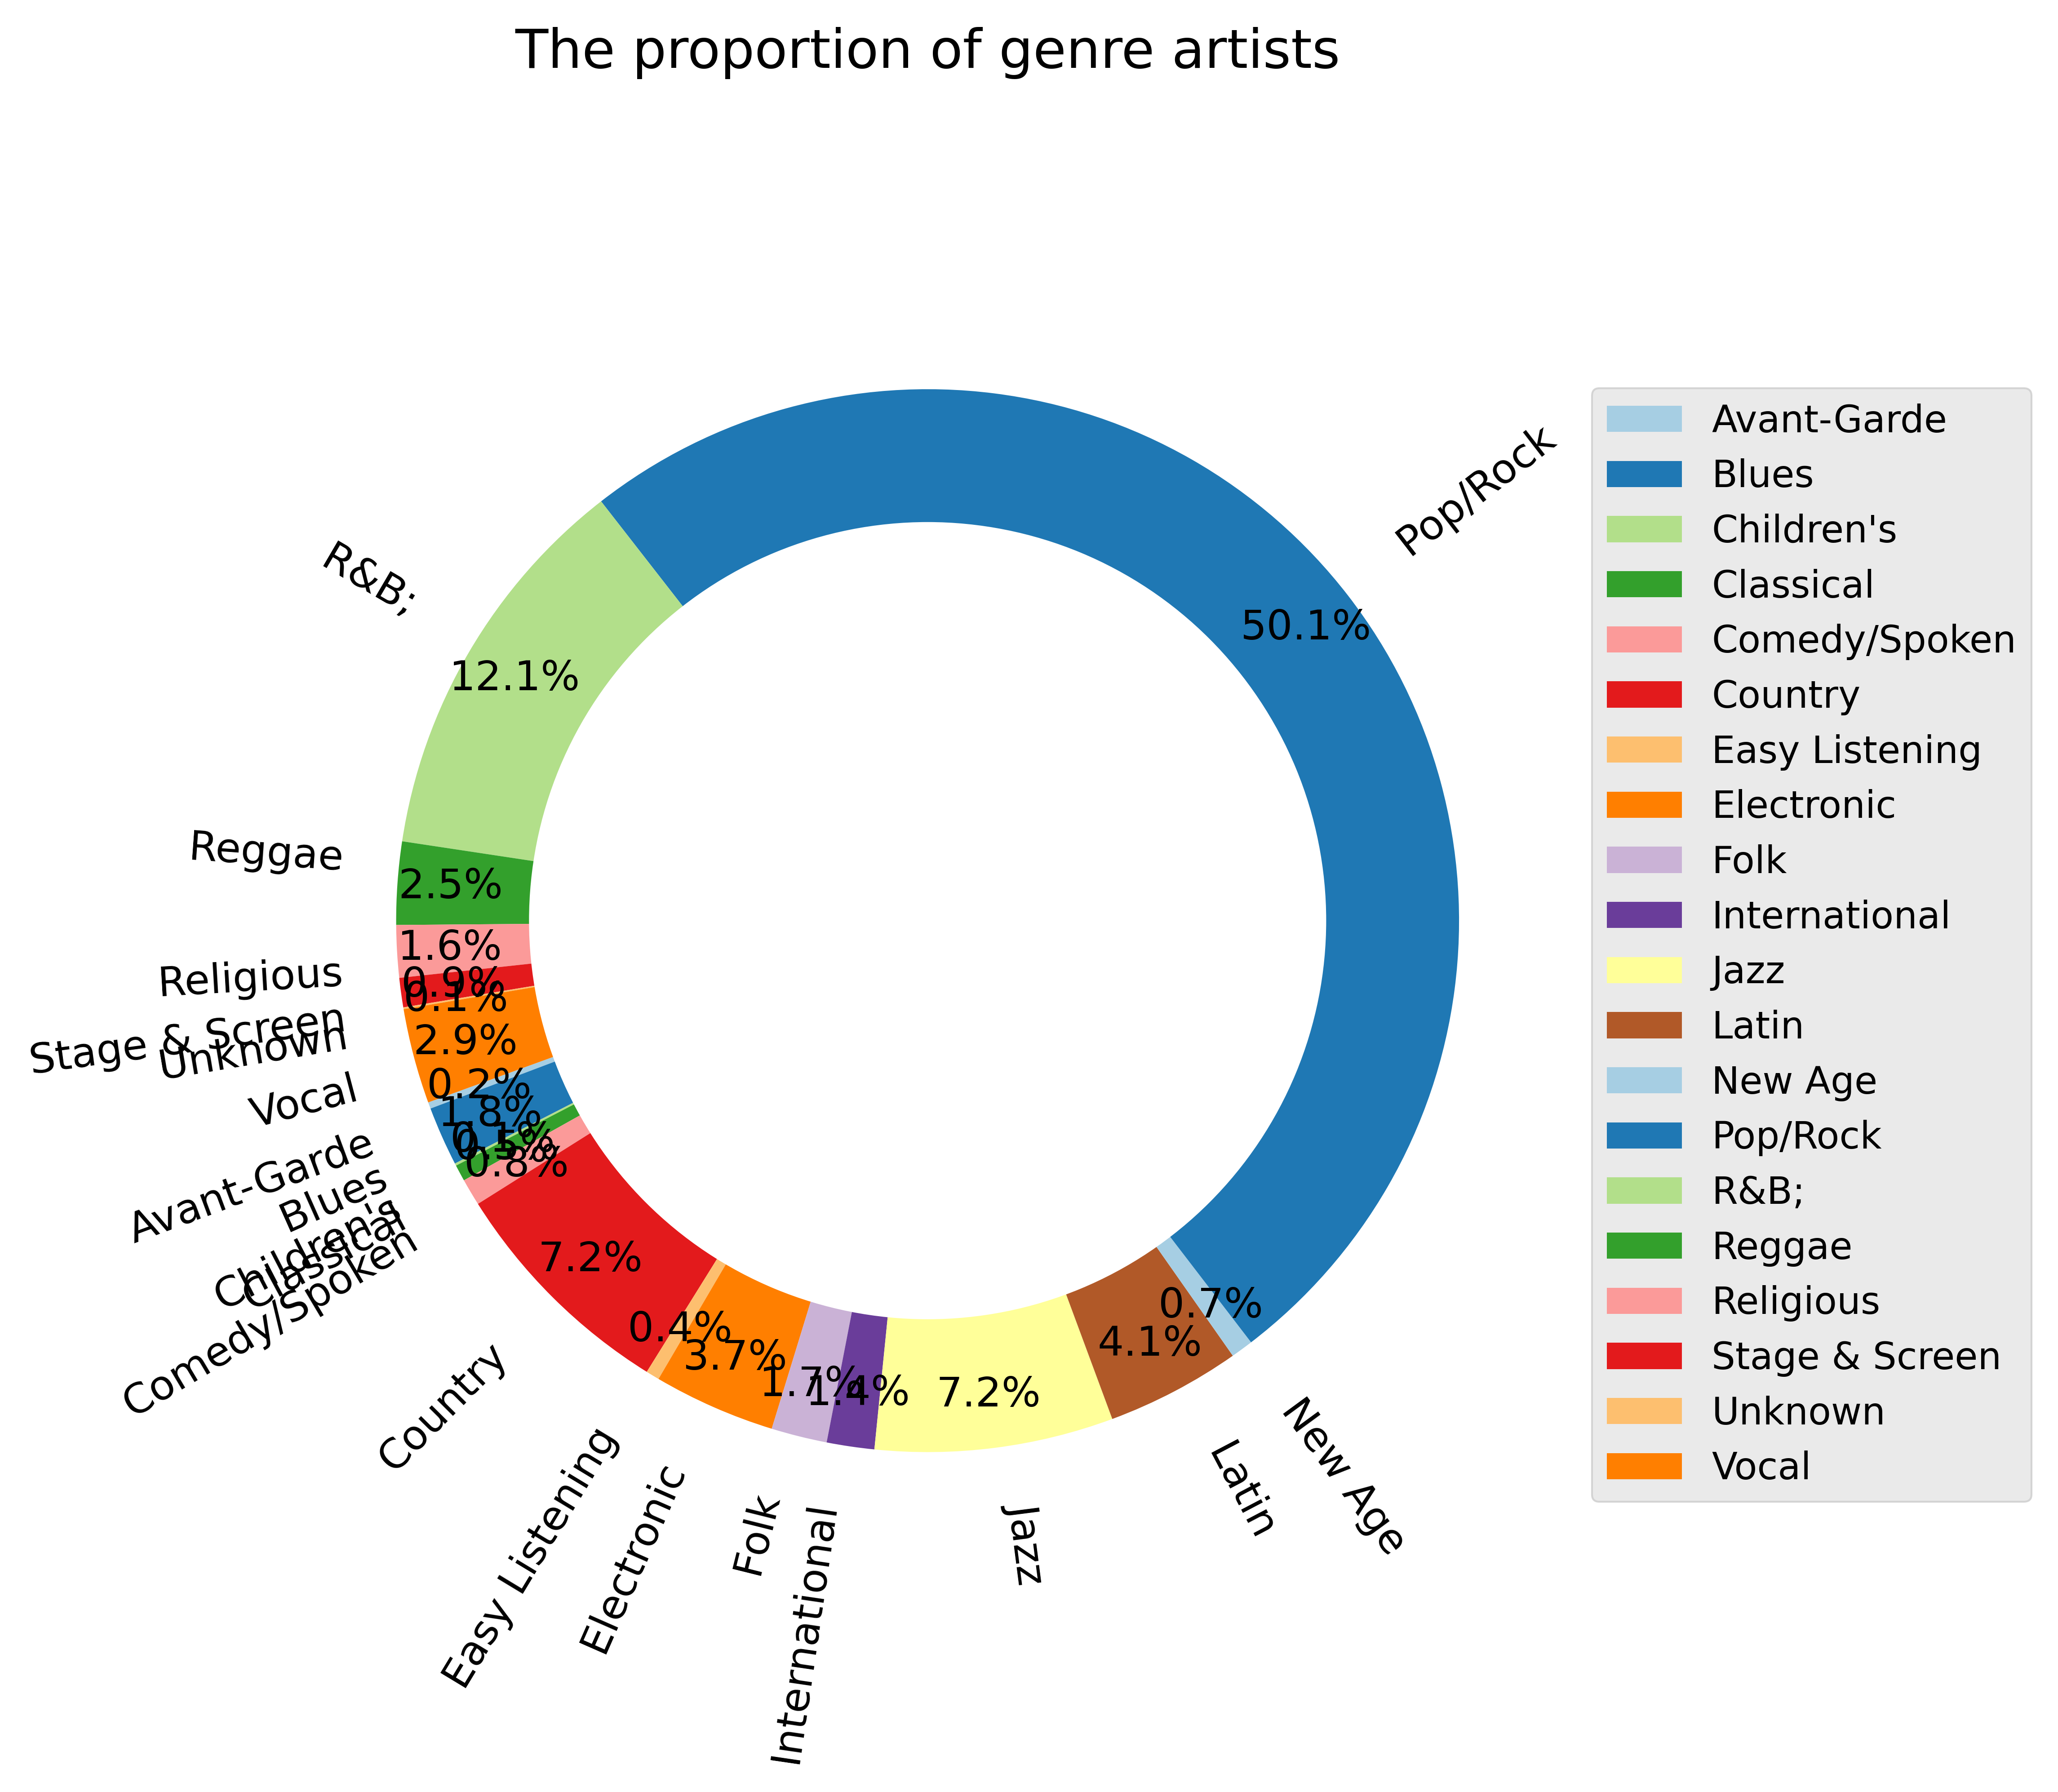

In [170]:
#按年总计股票成交笔数
plt.figure(figsize=(10,8),dpi=600)
# options={'fontsize':10}
plt.pie(x=result['num'],labeldistance = 1.1,pctdistance = 0.9,colors=sns.color_palette('Paired',20)  ,labels=result.index, radius=0.8,startangle=200
        ,autopct='%.1f%%',rotatelabels=True,textprops={'fontsize': 11})  #以时间为标签，总计成交笔数为数据绘制饼图，并显示3位整数一位小数
plt.pie([1],radius=0.6,colors='w')

plt.legend(loc=(0.9,0.15))#加标题
plt.title('The proportion of genre artists')  
plt.show()

In [172]:
s=result['num'].sum()
result['ratio']=result['num']/s

In [175]:
result=result.sort_values(by='ratio',ascending=False)

In [185]:
ratios=result['ratio'].tolist()
labels_all=list(result.index)

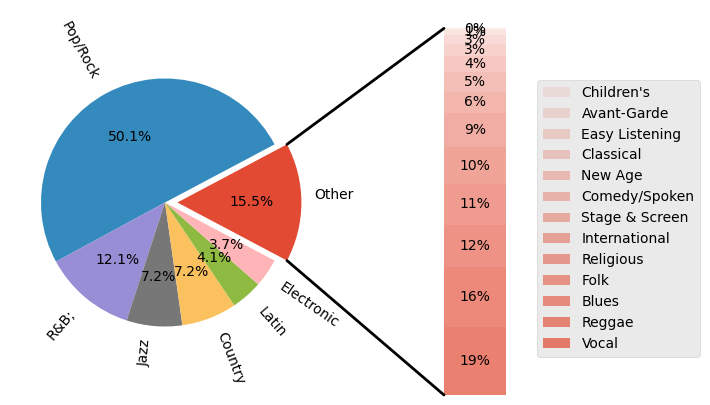

In [208]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [sum(ratios[6:-1]),*ratios[0:6]]
labels = ['Other', *labels_all[0:6]]
explode = [0.1, 0, 0, 0, 0,0,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode,rotatelabels=True)

# bar chart parameters

age_ratios = (np.array(ratios[6:-1])/sum(ratios[6:-1])).tolist()
age_labels = labels_all[6:-1]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.05 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.legend(loc=(0.7,0.1))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

# fig.set_title("The proportion of genre artists")
plt.show()

In [13]:
# DG.edges()
DG.nodes()

NodeView((759491, 74, 25462, 335, 66915, 71209, 91438, 113823, 132710, 208582, 378288, 397880, 489999, 492331, 615119, 651107, 747445, 755156, 838272, 895136, 899530, 960690, 988638, 75264, 441, 91650, 112789, 134729, 175775, 295756, 359326, 446509, 485135, 579839, 741746, 789064, 790820, 796045, 806829, 825087, 863790, 883318, 151290, 589, 286662, 748421, 5953, 1098, 12654, 59537, 61938, 81493, 84209, 130932, 139026, 182598, 187581, 200968, 349157, 354105, 379125, 390390, 485791, 490004, 503913, 562304, 574772, 604852, 623985, 754032, 771438, 772567, 840402, 8828, 1113, 81403, 546214, 628467, 13384, 1433, 19241, 65397, 86312, 99753, 136640, 175286, 210512, 234325, 409954, 749175, 804289, 50493, 1498, 96977, 97325, 219966, 561105, 607053, 1528006, 1589, 559405, 1611, 156886, 2252, 112017, 2273, 203804, 588679, 744548, 38936, 2330, 41874, 249175, 639397, 642542, 765585, 781837, 785283, 792507, 798543, 183867, 2411, 346336, 423829, 750519, 840102, 988440, 133969, 2578, 7689, 2750, 160690

In [9]:
nx.write_graphml(DG, "influence_1.gexf")

In [32]:
G = nx.from_pandas_edgelist(df, 'influencer_id', 'follower_id',create_using=nx.DiGraph())

## 第二问

In [66]:
print(DG.nodes())

[759491, 74, 25462, 335, 66915, 71209, 91438, 113823, 132710, 208582, 378288, 397880, 489999, 492331, 615119, 651107, 747445, 755156, 838272, 895136, 899530, 960690, 988638, 75264, 441, 91650, 112789, 134729, 175775, 295756, 359326, 446509, 485135, 579839, 741746, 789064, 790820, 796045, 806829, 825087, 863790, 883318, 151290, 589, 286662, 748421, 5953, 1098, 12654, 59537, 61938, 81493, 84209, 130932, 139026, 182598, 187581, 200968, 349157, 354105, 379125, 390390, 485791, 490004, 503913, 562304, 574772, 604852, 623985, 754032, 771438, 772567, 840402, 8828, 1113, 81403, 546214, 628467, 13384, 1433, 19241, 65397, 86312, 99753, 136640, 175286, 210512, 234325, 409954, 749175, 804289, 50493, 1498, 96977, 97325, 219966, 561105, 607053, 1528006, 1589, 559405, 1611, 156886, 2252, 112017, 2273, 203804, 588679, 744548, 38936, 2330, 41874, 249175, 639397, 642542, 765585, 781837, 785283, 792507, 798543, 183867, 2411, 346336, 423829, 750519, 840102, 988440, 133969, 2578, 7689, 2750, 160690, 208774,

In [5]:
from scipy import sparse

In [211]:
# for path in nx.all_simple_paths(DG,754032,477787):
#     print(path)

[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 73421, 154530, 840523, 817754, 139089, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 319021, 162197, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 405903, 130173, 610339, 162197, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 493327, 139089, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 493327, 162197, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 493327, 319021, 162197, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 493327, 817754, 139089, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 567570, 493327, 139089, 477787]
[754032, 2330, 51909, 755156, 219483, 357406, 414889, 148355, 943268, 747757, 567570, 493327, 162197, 477787]
[754032, 23

In [16]:
sorted(DG.nodes())

[74,
 335,
 441,
 589,
 1097,
 1098,
 1113,
 1163,
 1190,
 1266,
 1433,
 1498,
 1589,
 1611,
 2130,
 2252,
 2273,
 2330,
 2411,
 2578,
 2750,
 2867,
 3056,
 3170,
 3226,
 3413,
 3426,
 3595,
 3627,
 3669,
 3829,
 4358,
 4451,
 4458,
 4553,
 4852,
 4955,
 5307,
 5366,
 5441,
 5501,
 5882,
 5953,
 5980,
 6143,
 6232,
 6310,
 6320,
 6334,
 6563,
 6568,
 6613,
 6855,
 6860,
 7031,
 7230,
 7305,
 7448,
 7689,
 7729,
 7731,
 7920,
 7974,
 8125,
 8245,
 8549,
 8570,
 8591,
 8828,
 9084,
 9218,
 9437,
 9441,
 9490,
 9680,
 9787,
 9970,
 10412,
 10538,
 10982,
 11028,
 11046,
 11052,
 11210,
 11242,
 11506,
 11608,
 11620,
 11664,
 11707,
 11754,
 11910,
 11970,
 12128,
 12180,
 12472,
 12491,
 12570,
 12595,
 12644,
 12654,
 12802,
 12877,
 12972,
 13038,
 13101,
 13377,
 13384,
 13387,
 13393,
 13508,
 13511,
 13583,
 13755,
 14073,
 14201,
 14263,
 14329,
 14651,
 14699,
 14724,
 14757,
 14822,
 14931,
 14959,
 15158,
 15318,
 15405,
 15694,
 15856,
 16132,
 16186,
 16227,
 16235,
 16281,
 1

In [6]:
A = nx.adjacency_matrix(DG,nodelist=sorted(DG.nodes()))

C:\Users\ZuYong\AppData\Local\Temp\ipykernel_24540\3302698501.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(DG,nodelist=sorted(DG.nodes()))


In [53]:
A.max()

1

In [78]:
def matric_mi(x,k):
    out=x
    for i in range(k-1):
        out=x@out.setdiag(0)
    
    return out


In [169]:
A.shape

(5603, 5603)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [89]:
A_2=A@A
A_2.setdiag(0)
A_3=A_2@A
A_3.setdiag(0)

A_4=A_3@A
A_4.setdiag(0)
# sum_p=A+A_2*0.5+A_3*0.25+A_4*0.125
sum_p=A+A_2*0.5+A_3*0.25
# for k in range(2):
#     sum+=(1/(10**(k-1)))*matric_mi(A,k)

c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [90]:
sum_p.max()

113.5

In [81]:
A_4.max()

4802

In [74]:
sum_p.max()

113.5

In [26]:
del sum

<AxesSubplot:>

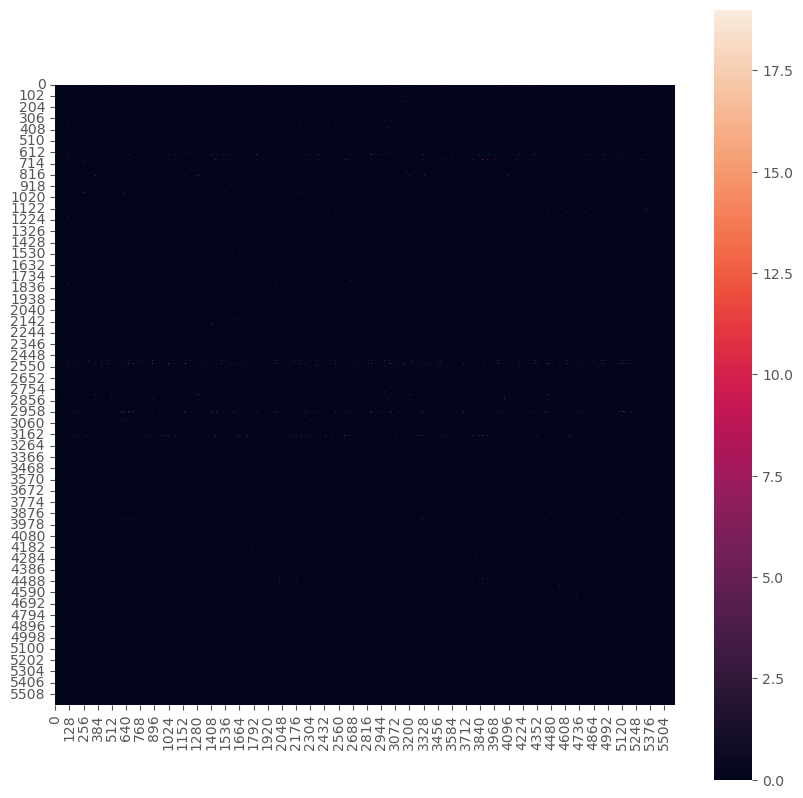

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(sum,square=True)

### g_ij

In [28]:
df['issame_genre']=(df['follower_main_genre']==df['influencer_main_genre']).astype('int')
# sorted(DG.nodes())
# for key ,value in zip(sorted(DG.nodes()),range(len(DG.nodes()))):
    # print(key,value)
map_1={ key:value for key,value in zip(sorted(DG.nodes()),range(len(DG.nodes()))) }
df['follower_id']=df['follower_id'].map(map_1)
df['influencer_id']=df['influencer_id'].map(map_1)
# df['influencer_id']

from scipy.sparse import csr_matrix, coo_matrix
def convert(df,key1,key2,key3):
    ''' Convert a dictionary with elements of form ('d1', 't1'): 12 to a CSR type         matrix.
    The element ('d1', 't1'): 12 becomes entry (0, 0) = 12.
    * Conversion from 1-indexed to 0-indexed.
    * d is row
    * t is column.
    '''
    # Create the appropriate format for the COO format.
    data = []
    row = []
    col = []
    for ind,v in df.iterrows():
        data.append(v[key3])
        row.append(v[key1])
        col.append(v[key2])
    # Create the COO-matrix
    coo = coo_matrix((data,(row,col)),shape=(5603,5603))
    # Let Scipy convert COO to CSR format and return
    return csr_matrix(coo)

In [29]:
issame_g=convert(df,'influencer_id','follower_id','issame_genre')

In [125]:
# print(convert(df,'influencer_id','follower_id','issame_genre'))

  (1, 81)	1
  (1, 226)	1
  (1, 787)	1
  (1, 832)	1
  (1, 1147)	1
  (1, 1711)	1
  (1, 2532)	1
  (1, 2597)	1
  (1, 3389)	1
  (1, 3747)	1
  (1, 3749)	1
  (1, 4321)	1
  (1, 4361)	1
  (1, 4714)	1
  (1, 4721)	1
  (1, 4854)	1
  (1, 4964)	1
  (1, 5166)	1
  (1, 5235)	1
  (1, 5242)	1
  (1, 5318)	1
  (1, 5364)	1
  (2, 763)	1
  (2, 2329)	1
  (4, 1365)	1
  :	:
  (5454, 5380)	0
  (5457, 200)	0
  (5457, 267)	1
  (5457, 359)	1
  (5457, 650)	1
  (5457, 795)	0
  (5457, 930)	0
  (5457, 961)	1
  (5457, 1729)	1
  (5457, 1743)	1
  (5457, 2225)	0
  (5457, 2784)	0
  (5457, 3415)	1
  (5457, 4385)	1
  (5457, 4471)	0
  (5457, 4815)	0
  (5457, 4941)	1
  (5459, 5410)	0
  (5459, 5559)	0
  (5462, 5596)	1
  (5480, 2134)	0
  (5497, 5528)	0
  (5512, 5373)	0
  (5560, 5394)	1
  (5586, 319)	1


<AxesSubplot:>

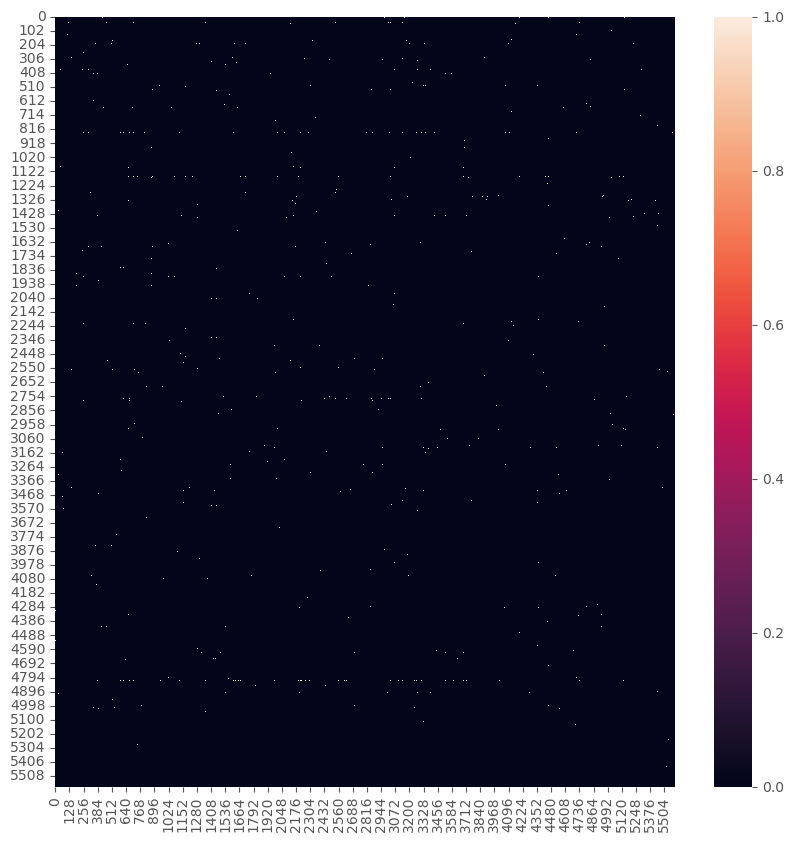

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(convert(df,'influencer_id','follower_id','issame_genre').todense())


In [33]:
def convert_re(df,key1,key2,key3):
    ''' Convert a dictionary with elements of form ('d1', 't1'): 12 to a CSR type         matrix.
    The element ('d1', 't1'): 12 becomes entry (0, 0) = 12.
    * Conversion from 1-indexed to 0-indexed.
    * d is row
    * t is column.
    '''
    # Create the appropriate format for the COO format.
    data = []
    row = []
    col = []
    for ind,v in df.iterrows():
        data.append(int(v[key3]==0))
        row.append(v[key1])
        col.append(v[key2])
    # Create the COO-matrix
    coo = coo_matrix((data,(row,col)),shape=(5603,5603))
    # Let Scipy convert COO to CSR format and return
    return csr_matrix(coo)

<AxesSubplot:>

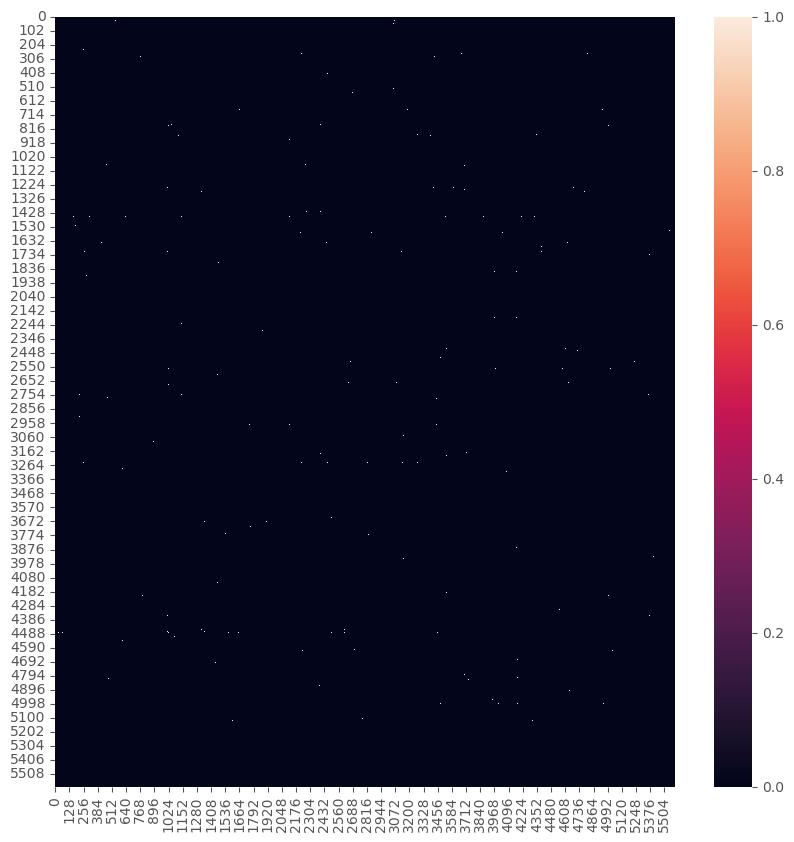

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(convert_re(df,'influencer_id','follower_id','issame_genre').todense())

In [34]:
pre=convert_re(df,'influencer_id','follower_id','issame_genre').todense()
p=convert(df,'influencer_id','follower_id','issame_genre').todense()
pall=p+pre
col=pall.sum(axis=0)

In [35]:
import numpy.matlib
col_dn=np.matlib.repmat(col,5603,1)

### p_ij

In [131]:
inde=dict(DG.in_degree(sorted(DG.nodes())))

In [132]:
inde

{74: 1,
 335: 20,
 441: 18,
 589: 3,
 1097: 0,
 1098: 30,
 1113: 4,
 1163: 0,
 1190: 0,
 1266: 0,
 1433: 12,
 1498: 6,
 1589: 1,
 1611: 1,
 2130: 0,
 2252: 1,
 2273: 4,
 2330: 11,
 2411: 8,
 2578: 1,
 2750: 8,
 2867: 12,
 3056: 0,
 3170: 3,
 3226: 4,
 3413: 0,
 3426: 2,
 3595: 5,
 3627: 8,
 3669: 17,
 3829: 2,
 4358: 1,
 4451: 3,
 4458: 1,
 4553: 1,
 4852: 9,
 4955: 2,
 5307: 22,
 5366: 0,
 5441: 28,
 5501: 21,
 5882: 11,
 5953: 25,
 5980: 7,
 6143: 6,
 6232: 2,
 6310: 17,
 6320: 16,
 6334: 13,
 6563: 1,
 6568: 3,
 6613: 4,
 6855: 1,
 6860: 4,
 7031: 3,
 7230: 14,
 7305: 2,
 7448: 11,
 7689: 18,
 7729: 7,
 7731: 17,
 7920: 24,
 7974: 1,
 8125: 19,
 8245: 4,
 8549: 18,
 8570: 8,
 8591: 9,
 8828: 26,
 9084: 7,
 9218: 2,
 9437: 15,
 9441: 7,
 9490: 6,
 9680: 8,
 9787: 10,
 9970: 4,
 10412: 19,
 10538: 12,
 10982: 8,
 11028: 0,
 11046: 6,
 11052: 12,
 11210: 1,
 11242: 2,
 11506: 1,
 11608: 10,
 11620: 0,
 11664: 1,
 11707: 13,
 11754: 10,
 11910: 8,
 11970: 0,
 12128: 11,
 12180: 11,
 124

In [220]:
np.divide(p.sum(axis=0),col,where=(col!=0))

matrix([[1.        , 0.9       , 0.94444444, ..., 0.        , 1.        ,
         0.25      ]])

In [221]:
np.divide(pre.sum(axis=0),col,where=(col!=0))

matrix([[0.        , 0.1       , 0.05555556, ..., 1.        , 0.        ,
         0.75      ]])

In [36]:
PP=np.multiply(p,np.matlib.repmat(np.divide(p.sum(axis=0),col,where=(col!=0)),5603,1))+np.multiply(pre,np.matlib.repmat(np.divide(p.sum(axis=0),col,where=(col!=0)),5603,1))

In [23]:
PP.shape

(5603, 5603)

<AxesSubplot:>

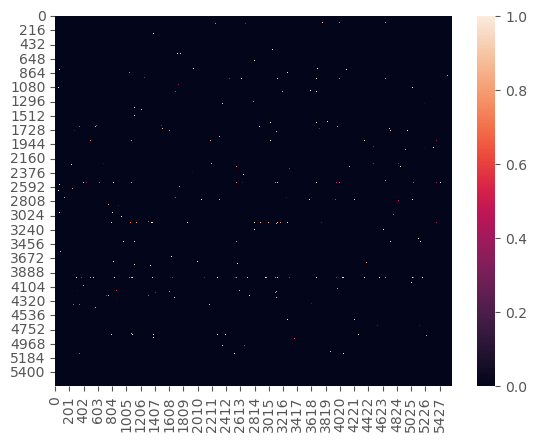

In [22]:
sns.heatmap(PP)

### t_ij


In [24]:
df.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,issame_genre
0,4010,The Exploited,Pop/Rock,1980,0,Special Duties,Pop/Rock,1980,1
1,219,Tricky,Electronic,1990,1,PJ Harvey,Pop/Rock,1990,0
2,559,Bob Dylan,Pop/Rock,1960,1,PJ Harvey,Pop/Rock,1990,1
3,590,Leonard Cohen,Pop/Rock,1950,1,PJ Harvey,Pop/Rock,1990,1
4,762,The Gun Club,Pop/Rock,1980,1,PJ Harvey,Pop/Rock,1990,1


In [7]:
dict_t={}
for ind,val in df.iterrows():
    dict_t[val['influencer_id']]=val['influencer_active_start']
    dict_t[val['follower_id']]=val['follower_active_start']

In [44]:
len(dict_t)

5603

In [8]:
def sorted_di(adict):
    
    keys=adict.keys()
    keys=sorted(keys)
    
    return [adict[key] for key in keys]


In [9]:
an=sorted_di(dict_t)

In [52]:
print(dict_t[1])

1990


In [12]:
an=np.array(an).reshape((1,5603))

In [13]:
T_ij=an.T - an
del an

In [14]:
T_ij=abs(T_ij)

In [63]:
T_ij.sum(axis=1)

array([ 26840,  82870,  82870, ..., 194930, 194930, 194930])

<AxesSubplot:>

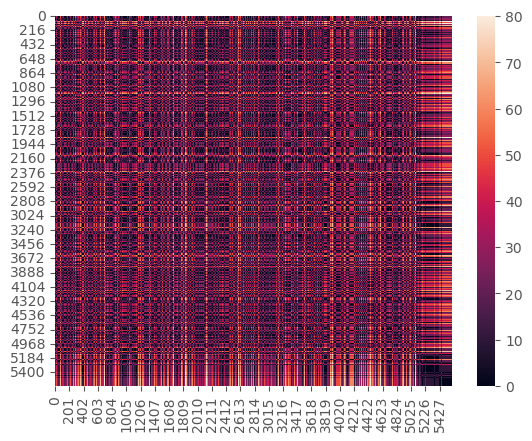

In [65]:
sns.heatmap(T_ij)

In [15]:
T_p=np.multiply(T_ij,A.todense())

In [19]:
# T_p.max()

80

In [41]:
T_p=T_p/80

In [42]:
T_p.max()

1.0

<AxesSubplot:>

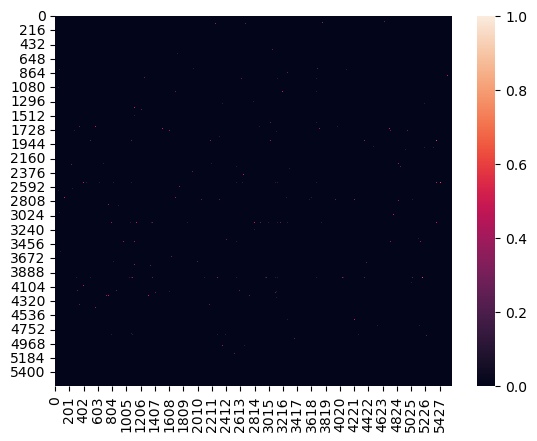

In [20]:
sns.heatmap(T_p)

## sum_p+issameg+PP+T_ij

In [65]:
PP.max()

1.0

In [64]:
issame_g.max()

1

In [71]:
sum_p.mean()

0.005502482686842354

In [69]:
T_p.max()

1.0

In [91]:
M_ij=sum_p+issame_g+PP+T_p

<AxesSubplot:>

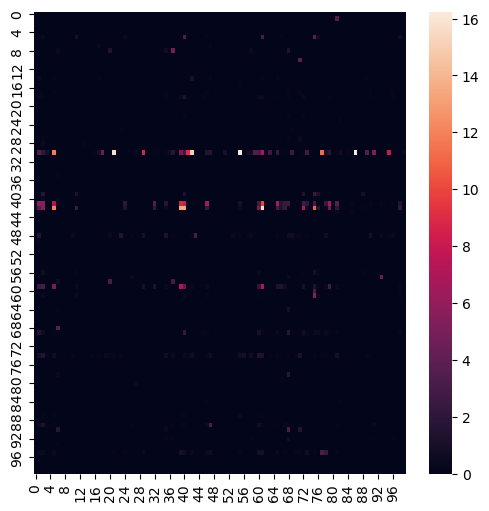

In [92]:
plt.figure(figsize=(6,6))
sns.heatmap(M_ij[0:100,0:100])

In [93]:
prow=M_ij.sum(axis=1)


In [94]:
prow

matrix([[  0.        ],
        [178.41335668],
        [  6.        ],
        ...,
        [  0.        ],
        [  0.        ],
        [  0.        ]])

In [95]:
prow=np.divide(1,prow,where=(prow!=0))
M_ij_p=np.multiply(M_ij,np.matlib.repmat(prow,1,5603))

In [97]:
M_ij_p.sum(axis=1)

matrix([[False],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [102]:
np.array(M_ij_p).shape

(5603, 5603)

In [103]:
alpha = 0.85
N=5603
A = alpha*np.array(M_ij_p) + (1-alpha) / N * np.ones([N, N])
print(A)

# 生成初始的PageRank值，记录在P_n中，P_n和P_n1均用于迭代
P_n = np.ones(N) / N
P_n1 = np.zeros(N)

e = 100000  # 误差初始化
k = 0   # 记录迭代次数
print('loop...')


[[2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]
 [2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]
 [2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]
 ...
 [2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]
 [2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]
 [2.67713725e-05 2.67713725e-05 2.67713725e-05 ... 2.67713725e-05
  2.67713725e-05 2.67713725e-05]]
loop...


In [104]:

while e > 0.000001:   # 开始迭代
    P_n1 = np.dot(A, P_n)   # 迭代公式
    e = P_n1-P_n
    e = max(map(abs, e))    # 计算误差
    P_n = P_n1
    k += 1
    print('iteration %s:'%str(k), P_n1)

print('final result:', P_n)

iteration 1: [2.67713725e-05 1.78475817e-04 1.78475817e-04 ... 2.67713725e-05
 2.67713725e-05 2.67713725e-05]
iteration 2: [1.93431886e-05 1.00446700e-04 4.20988552e-05 ... 1.93431886e-05
 1.93431886e-05 1.93431886e-05]
iteration 3: [1.18720694e-05 4.85177429e-05 2.83137797e-05 ... 1.18720694e-05
 1.18720694e-05 1.18720694e-05]
iteration 4: [6.35575244e-06 2.57058164e-05 1.64470114e-05 ... 6.35575244e-06
 6.35575244e-06 6.35575244e-06]
iteration 5: [3.38222511e-06 1.41694144e-05 8.78461468e-06 ... 3.38222511e-06
 3.38222511e-06 3.38222511e-06]
iteration 6: [1.83071806e-06 7.69286877e-06 4.70560940e-06 ... 1.83071806e-06
 1.83071806e-06 1.83071806e-06]
iteration 7: [9.93659934e-07 4.15385777e-06 2.54977029e-06 ... 9.93659934e-07
 9.93659934e-07 9.93659934e-07]
iteration 8: [5.38099376e-07 2.24740221e-06 1.38271032e-06 ... 5.38099376e-07
 5.38099376e-07 5.38099376e-07]
iteration 9: [2.91288150e-07 1.21720420e-06 7.48672619e-07 ... 2.91288150e-07
 2.91288150e-07 2.91288150e-07]
iteration 

In [109]:
len(P_n)

5603

In [114]:
sorted(P_n,reverse=True)

[9.171243641786985e-07,
 8.87553076741833e-07,
 8.499013541684501e-07,
 8.097047111526644e-07,
 8.051500015985694e-07,
 7.645019754185384e-07,
 7.53349466975204e-07,
 7.381951663542189e-07,
 7.372291524558204e-07,
 7.338381909775025e-07,
 7.311425606195886e-07,
 7.272587313093144e-07,
 7.268738785811407e-07,
 7.259199944834534e-07,
 7.203295974220223e-07,
 7.187581911157069e-07,
 7.155765402635007e-07,
 7.133929322123318e-07,
 7.108634818103517e-07,
 7.108145169567057e-07,
 7.090800974850195e-07,
 7.024111966234368e-07,
 7.024111966234368e-07,
 6.98989501336448e-07,
 6.977727861302104e-07,
 6.953988604924942e-07,
 6.935755646975959e-07,
 6.897672602246795e-07,
 6.896032837173712e-07,
 6.889313863072125e-07,
 6.850148221872772e-07,
 6.850007679591891e-07,
 6.828165238073852e-07,
 6.82379159496664e-07,
 6.809698612629556e-07,
 6.809683857597383e-07,
 6.78818627802967e-07,
 6.783166831861346e-07,
 6.761689571862572e-07,
 6.761029236495359e-07,
 6.760772032995615e-07,
 6.750964696527208e-0

In [116]:
import heapq
list_top20=heapq.nlargest(20, range(N), key=lambda x: P_n[x]) 

In [117]:
def get_keys(d, value):
    return [k for k,v in d.items() if v == value]

In [118]:
top20_id=[]
for inx in list_top20:
    top20_id.append(get_keys(map_1,inx))
    

In [119]:
top20_id

[[135059],
 [819946],
 [256831],
 [551115],
 [783025],
 [484607],
 [642427],
 [82037],
 [749272],
 [694411],
 [720786],
 [230886],
 [762921],
 [276592],
 [921384],
 [140521],
 [931567],
 [85445],
 [28316],
 [261332]]

In [143]:
def get_names(df,id):
    for ind,row in df.iterrows():
        if row['influencer_id']==id[0]:
            return df.loc[ind,'influencer_name']
        elif row['follower_id']==id[0]:
            # print("yes")
            return df.loc[ind,'follower_name']
        else:
            continue
    return -1
    
for id in top20_id:
    # print(id)
    print(get_names(df_1,id))


Classics IV
Leroy Hutson
Levi Stubbs
J. Holiday
Jimmy Yancey
Millencolin
Buddy Clark
Ike Quebec
Slim & Slam
Zap Pow
Pete Brown
Roaring Lion
The Charioteers
Jess Stacy
Mitch Miller & the Sing-Along Gang
The Crew Cuts
Titus Turner
Bobby Marchan
Slim Smith
Jonah Jones


In [141]:
for id in top20_id:
    num=id[0]
    print(num)
    # print(df['follower_id']==num)

135059
819946
256831
551115
783025
484607
642427
82037
749272
694411
720786
230886
762921
276592
921384
140521
931567
85445
28316
261332


## random forest classfier

In [1]:
import pandas as pd
from sklearn.linear_model import SGDClassifier

In [183]:
df=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\data_by_artist.csv")
df.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092


In [7]:
artist_genre={}
df_genre=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\influence_data.csv")


In [8]:
df_genre.columns

Index(['influencer_id', 'influencer_name', 'influencer_main_genre',
       'influencer_active_start', 'follower_id', 'follower_name',
       'follower_main_genre', 'follower_active_start'],
      dtype='object')

In [9]:
for ind,row in df_genre.iterrows():
    artist_genre[row['influencer_id']]=row['influencer_main_genre']
    artist_genre[row['follower_id']]=row['follower_main_genre']    

In [3]:
df.columns 

Index(['artist_name', 'artist_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'duration_ms', 'popularity', 'count'],
      dtype='object')

In [185]:
df['target']=df['artist_id'].map(artist_genre)

In [20]:
df.shape

(5602, 17)

In [186]:
df=df.dropna(axis=0)

In [271]:
X = df[[
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness',
    'duration_ms', 'popularity'
]].values
X
y=df['target'].values

In [272]:
df.columns

Index(['artist_name', 'artist_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'duration_ms', 'popularity', 'count',
       'target'],
      dtype='object')

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, mean_squared_error 


In [274]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=532)
rf = RandomForestClassifier(n_estimators=100,criterion= "gini",max_depth=12,min_samples_leaf=13)
rf.fit(X_train, y_train)
rf.predict_proba(X_train)
print(rf.score(X_train, y_train),
rf.score(X_test,y_test))
xg=XGBClassifier(n_estimators=90,objective='multi:softproba',gamma=0.2,learning_rate=0.1
                 ,n_jobs=6,num_class=20)
xg.fit(X_train,y_train)
xg.score(X_test,y_test)

0.682883284981031 0.6173059768064229


0.6458519179304193

In [275]:
xg.predict_proba(X_train)
print(xg.score(X_train, y_train))

0.9645168489176523


In [276]:
xg.feature_importances_.shape

(13,)

In [277]:
df.columns[2:-2].tolist()

['danceability',
 'energy',
 'valence',
 'tempo',
 'loudness',
 'mode',
 'key',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness',
 'duration_ms',
 'popularity']

<BarContainer object of 13 artists>

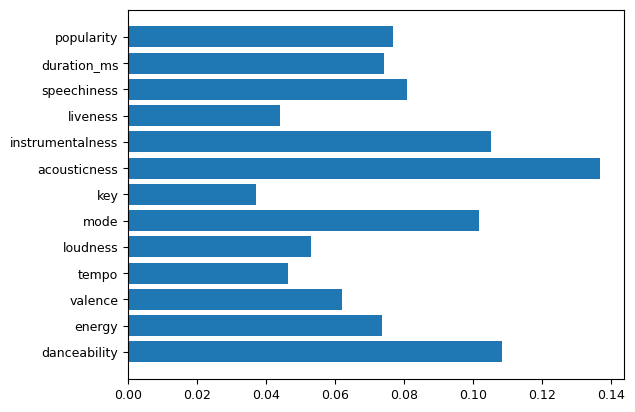

In [278]:
plt.barh(df.columns[2:-2].tolist(), xg.feature_importances_)

In [279]:
sorted_idx = xg.feature_importances_.argsort()
sorted_idx

array([ 6,  9,  3,  4,  2,  1, 11, 12, 10,  5,  8,  0,  7], dtype=int64)

In [280]:
df.columns[2:-2][sorted_idx].tolist()

['key',
 'liveness',
 'tempo',
 'loudness',
 'valence',
 'energy',
 'duration_ms',
 'popularity',
 'speechiness',
 'mode',
 'instrumentalness',
 'danceability',
 'acousticness']

(0.0, 0.2)

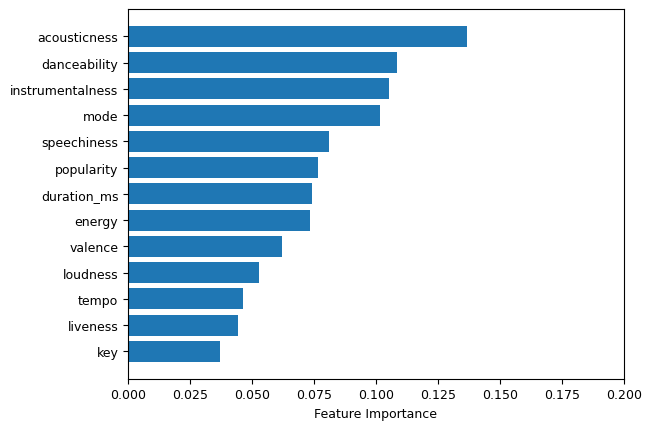

In [281]:
plt.barh(df.columns[2:-2][sorted_idx].tolist(), xg.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.xlim(0,0.2)

In [282]:
predictions = xg.predict(X)
# actuals = y_test
predictions

array([19,  5, 19, ..., 14,  5, 13], dtype=int64)

In [283]:
predictions=le.inverse_transform(predictions)

In [284]:
actuals=le.inverse_transform(y)
print("混淆矩阵:")
print(confusion_matrix(actuals, predictions))

混淆矩阵:
[[   7    0    0    0    0    0    0    0    0    0    0    0    1    2
     0    0    0    0    0    1]
 [   0   82    0    0    0    1    0    0    0    0    2    0    0   11
     4    0    0    0    0    1]
 [   0    0    2    0    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    1]
 [   0    0    0   24    0    0    0    0    0    0    2    0    0    1
     0    0    0    0    0    1]
 [   0    0    0    0   39    1    0    0    0    0    0    0    0    5
     0    1    0    0    0    0]
 [   0    2    0    0    0  332    0    0    2    0    2    1    0   61
     2    0    0    0    0    1]
 [   0    0    0    0    0    0   14    0    0    1    4    0    0    3
     0    0    0    1    0    0]
 [   0    0    0    2    0    0    0  174    0    0    3    0    0   21
     7    0    0    1    0    0]
 [   0    0    0    0    0    2    0    0   74    0    1    1    0   12
     2    0    1    0    0    2]
 [   0    1    0    0    0    0    0    0    1   

In [244]:
# df.columns[2:-1][sorted_idx].tolist()[0:5]

['key', 'liveness', 'tempo', 'loudness', 'valence']

In [245]:
# X=df[df.columns[2:-1][sorted_idx].tolist()[0:5]].values

In [246]:
xg.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [285]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [286]:
confusion_matrix(actuals, predictions).shape

(20, 20)

In [249]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

<Figure size 3600x3600 with 0 Axes>

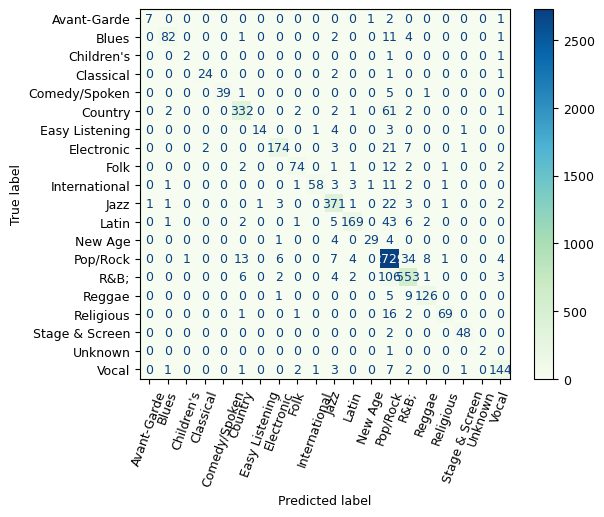

In [287]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(actuals, predictions), display_labels=le.inverse_transform(xg.classes_))
plt.figure(figsize=(6,6),dpi=600)
plt.rcParams['font.size'] =9
disp.plot(
    include_values=True,            # 混淆矩阵每个单元格上显示具体数值
    cmap="GnBu",                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax=None,                        # 同上
    # xticks_rotation="horizontal",   # 同上
    values_format="d" 
    # 显示的数值格式
)
plt.xticks(rotation=70,fontsize=9)
plt.show()

In [251]:
estimator = RandomForestClassifier()

In [252]:
param={
    "n_estimators":[300,400,600],
    # "max_depth":[5,8,10,12],
    "min_samples_leaf" : [5,10,30]
}

# 每年的主流音乐

In [253]:
dy=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\data_by_year.csv")

In [297]:
dy.head()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,label
0,1921,0.425661,0.236784,0.425495,100.397758,-17.095437,1,7,0.895823,0.322330,0.215814,0.077258,229911.9141,0.351562,Jazz
1,1922,0.480000,0.237026,0.534056,101.376139,-19.179958,1,10,0.939236,0.440470,0.238647,0.115419,167904.5417,0.138889,Jazz
2,1923,0.568462,0.246936,0.624788,112.456598,-14.373882,1,0,0.976329,0.401932,0.236656,0.098619,178356.3018,5.727811,Jazz
3,1924,0.548654,0.347033,0.668574,120.653359,-14.202304,1,10,0.935575,0.583955,0.237875,0.090210,188461.6498,0.603376,Jazz
4,1925,0.571890,0.264373,0.616430,115.671715,-14.516707,1,5,0.965422,0.408893,0.243094,0.115457,184130.6996,2.707224,Jazz


In [255]:
df.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count,target
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369,Vocal
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104,Country
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095,Vocal
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092,Pop/Rock
5,The Rolling Stones,894465,0.524446,0.719915,0.655332,123.764717,-7.830265,1,0,0.293788,0.176137,0.268443,0.051440,229705.9623,34.573913,1035,Pop/Rock


In [300]:
X_dy=dy[dy.columns[1:-1].tolist()].values

In [301]:
y=xg.predict(X_dy)

In [302]:
label=le.inverse_transform(y)

In [266]:
label

array(['Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'International', 'Jazz', 'Jazz',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz',
       'Jazz', 'Jazz', 'Jazz', 'Stage & Screen', 'Jazz', 'Jazz', 'Jazz',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'R&B;', 'R&B;', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock', 'Pop/Rock',
       'Pop/Rock', 'Pop/Rock', 'Pop

In [327]:
res = {}
res2={}
for cl in le.classes_:
    print(le.transform([cl])[0])
    # res.update({cl:le.transform([cl])[0]})
    res2[le.transform([cl])[0]]=cl

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [329]:
res2

{0: 'Avant-Garde',
 1: 'Blues',
 2: "Children's",
 3: 'Classical',
 4: 'Comedy/Spoken',
 5: 'Country',
 6: 'Easy Listening',
 7: 'Electronic',
 8: 'Folk',
 9: 'International',
 10: 'Jazz',
 11: 'Latin',
 12: 'New Age',
 13: 'Pop/Rock',
 14: 'R&B;',
 15: 'Reggae',
 16: 'Religious',
 17: 'Stage & Screen',
 18: 'Unknown',
 19: 'Vocal'}

In [303]:
y.shape

(100,)

In [267]:
dy['label']=label

In [289]:
x=dy['year'].values

In [290]:
x

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

In [291]:
list_time = []
for i in range(101):
    list_time.append(i + 0.5)


In [314]:
colors = plt.cm.get_cmap('GnBu', 20)


In [316]:
colors(2/20)

(0.8926728586171311, 0.9585139318885448, 0.8718266253869968, 1.0)

In [307]:
import numpy as np

In [334]:
dy = pd.get_dummies(dy, columns=['label'])

In [342]:
dy.columns

Index(['year', 'danceability', 'energy', 'valence', 'tempo', 'loudness',
       'mode', 'key', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'duration_ms', 'popularity', 'label_Electronic',
       'label_International', 'label_Jazz', 'label_Pop/Rock', 'label_R&B;',
       'label_Stage & Screen'],
      dtype='object')

In [343]:
dyp = dy[[
    'year', 'label_Electronic', 'label_International', 'label_Jazz',
    'label_Pop/Rock', 'label_R&B;', 'label_Stage & Screen'
]]

In [358]:
dyp.to_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\流行.csv")

In [345]:
label_genre = [
    'Electronic', 'International', 'Jazz', 'Pop/Rock', 'R&B', 'Stage & Screen'
]

In [ ]:
matrix = dyp[[
    'label_Electronic', 'label_International', 'label_Jazz', 'label_Pop/Rock',
    'label_R&B;', 'label_Stage & Screen'
]]
dyp[dyp==0]=np.nan

In [ ]:
# dyp['label_Electronic']=dyp['label_Electronic']
for i, label in enumerate([
        'label_Electronic', 'label_International', 'label_Jazz',
        'label_Pop/Rock', 'label_R&B;', 'label_Stage & Screen'
]):
    dyp[label] = dyp[label] * (i + 1)

<Figure size 4800x3000 with 0 Axes>

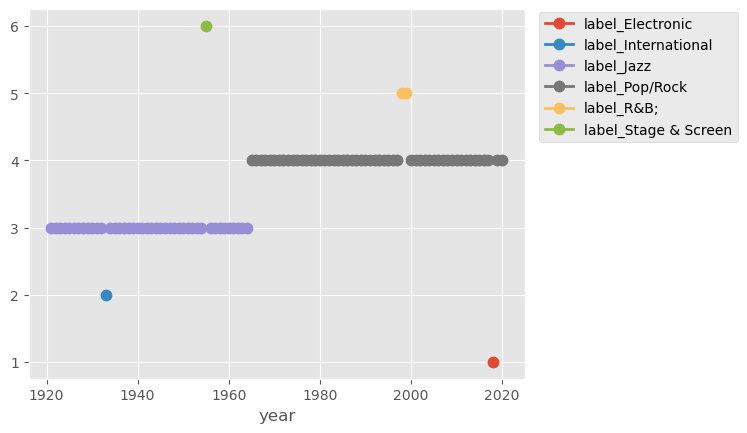

In [400]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=600)

dyp.plot.line(x='year',y=['label_Electronic', 'label_International', 'label_Jazz', 'label_Pop/Rock',
    'label_R&B;', 'label_Stage & Screen'], lw=2, marker=".", markersize=15)
plt.legend(loc=(1.03,0.64))
plt.savefig('tmp.pdf',bbox_inches="tight")

## 第四问

In [401]:
da=pd.read_csv(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\data\2021_ICM_Problem_D_Data\data_by_artist.csv")
da.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092


In [403]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis=0)


In [405]:
da.columns

Index(['artist_name', 'artist_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'duration_ms', 'popularity', 'count'],
      dtype='object')

In [407]:
need_label = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key',
    'acousticness', 'instrumentalness', 'liveness'
]


In [408]:
da_norm=da.copy()
da_norm[need_label]=mean_norm(da_norm[need_label])

In [410]:
da_norm

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,-1.190115,-1.608125,-0.903049,-0.530783,-1.032300,0.466387,-0.145898,1.329673,-0.477367,0.313171,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,-1.495436,-2.159715,-1.593802,-1.327897,-3.167002,0.466387,-1.282783,2.192502,3.199482,-0.102571,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.550895,-0.629824,0.676686,-0.277474,-0.391566,0.466387,1.275209,1.160069,-0.469695,0.400439,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.201939,-1.777754,-0.230727,-0.544842,-0.782237,0.466387,-0.145898,1.915865,-0.510730,0.189388,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,-0.242246,-0.497676,0.033912,0.302711,-0.293765,0.466387,0.422545,0.742698,-0.420173,0.974941,0.064535,256713.4203,30.860806,1092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Natalie La Rose,3359519,2.105997,-0.302965,0.948008,-0.801601,0.297275,0.466387,-1.567004,-1.162463,-0.566617,-1.120228,0.037600,189907.0000,64.000000,1
5850,Sarah Ross,3381566,1.299579,1.659521,0.403744,-1.844248,0.950920,0.466387,0.706766,-1.121062,-0.566670,1.069830,0.159000,262760.0000,52.000000,1
5851,Rotimi,3410250,0.678120,-0.390906,-0.569940,-0.853608,0.911204,-2.143775,-1.567004,-0.388536,-0.566417,-0.832696,0.187000,185461.0000,71.000000,1
5852,Jillian Jacqueline,3455945,0.012271,0.400568,-1.308941,1.848365,1.180366,0.466387,1.559430,-0.134186,-0.566670,-0.827531,0.049600,213133.0000,58.000000,1


In [ ]:
df